
# **Concept of Regression and Line Fitting**

This notebook introduces Linear Regression in the simplest possible way using a tiny dataset.

We will:
1. Create a small example dataset (Study Hours → Marks)  
2. Train a Linear Regression model  
3. Visualize the scatter plot  
4. Draw the best fit line  
5. Predict marks for a new study hour value    

## **Step 1: Import Libraries**

In [3]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


     -------------------------------------- 13.1/13.1 MB 754.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 738.6 kB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 790.5 kB/s eta 0:00:00
     -------------------------------------- 73.8/73.8 kB 815.4 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 721.4 kB/s eta 0:00:00
     ------------------------------------ 113.9/113.9 kB 950.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 663.9 kB/s eta 0:00:00
     -------------------------------------- 38.7/38.7 MB 664.3 kB/s eta 0:00:00
     -------------------------------------- 309.1/309.1 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.



## **Step 2: Create a Simple Dataset**

We will use the following dataset:

| Hours Studied | Marks |
|---------------|--------|
| 2 | 55 |
| 4 | 60 |
| 6 | 70 |
| 8 | 80 |
| 10 | 88 |

We turn this into NumPy arrays.


In [4]:
#Create a Simple Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1,1)
marks = np.array([55, 60, 70, 80, 88])

hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))


## **Step 3: Train a Linear Regression Model**

We use scikit-learn to train the model.  
The model will automatically learn:

- **Slope (m)**  
- **Intercept (c)**  


In [5]:
#Train a Linear Regression Model
model = LinearRegression()
model.fit(hours, marks)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False



## **Step 4: View the Learned Parameters**

The regression line equation is:

### \( y = m x + c \)

Where:
- **m = slope**
- **c = intercept**


In [6]:
#View the Learned Parameters
print("m: ", model.coef_[0])
print("c: ", model.intercept_)
# marks = 4.3xhours + 44.8

m:  4.3
c:  44.8


In [7]:
#VERIFYING THE MATH (UNDER THE HOOD)

# Concept: Ordinary Least Squares (OLS) Formulas
# The slope (m) and intercept (c) can be calculated directly using:
# m = Σ(x - x_mean)(y - y_mean) / Σ(x - x_mean)^2
# c = y_mean - (m * x_mean)

# Calculate means
x_mean = np.mean(hours)
y_mean = np.mean(marks)

# Calculate Slope (m) manually
numerator = np.sum((hours - x_mean) * (marks - y_mean))
denominator = np.sum((hours - x_mean) ** 2)
m_manual = numerator / denominator

# Calculate Intercept (c) manually
c_manual = y_mean - (m_manual * x_mean)

print(f"Manual Calculation -> m: {m_manual:.2f}, c: {c_manual:.2f}")
print(f"Scikit-Learn Model -> m: {model.coef_[0]:.2f}, c: {model.intercept_:.2f}")

# Conclusion: They should match perfectly!

Manual Calculation -> m: 0.00, c: 70.60
Scikit-Learn Model -> m: 4.30, c: 44.80



## **Step 5: Visualize the Best Fit Line**

Below:
- Blue dots = actual student data  
- Red line = best fit line learned by the model  


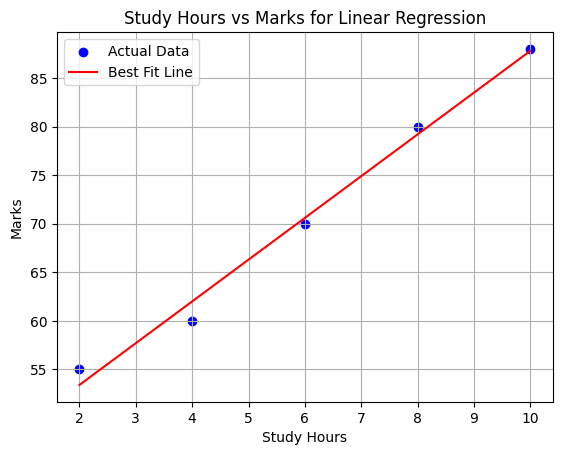

In [8]:
#Visualize the Best Fit Line
plt.scatter(hours, marks, color='blue', label="Actual Data")

predicted_marks = model.predict(hours)
plt.plot(hours,predicted_marks, color='red', label="Best Fit Line")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# MODEL EVALUATION
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get predictions for the known data
y_pred = model.predict(hours)

# 1. Mean Absolute Error (MAE): Average absolute difference between actual and predicted
mae = mean_absolute_error(marks, y_pred)

# 2. Mean Squared Error (MSE): Average squared difference (penalizes large errors more)
mse = mean_squared_error(marks, y_pred)

# 3. Root Mean Squared Error (RMSE): The error in the same units as the target variable
rmse = np.sqrt(mse)

# 4. R-squared (R2): How well the regression line approximates the real data points (0 to 1)
r2 = r2_score(marks, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

MAE: 1.04
MSE: 1.52
RMSE: 1.23
R-squared Score: 0.9898


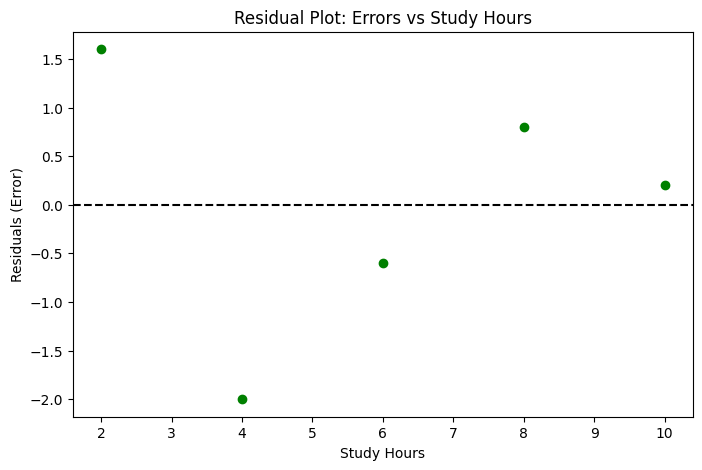

In [10]:
# RESIDUAL ANALYSIS

# Calculate residuals (Actual - Predicted)
residuals = marks - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(hours, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Study Hours")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot: Errors vs Study Hours")
plt.show()

# Insight:
# If points are randomly scattered around the line 0, the linear model is good.
# If there is a U-shape or pattern, the data might be non-linear!


## **Step 6: Predict Marks for a New Student**

Let’s predict marks for someone who studies **7 hours**.


In [11]:
#Predict Marks for a New Student
new_hours = np.array([[7]])
prediction = model.predict(new_hours)
print("Predicted Marks: ", prediction[0])

Predicted Marks:  74.89999999999999



## **Summary**

In this notebook, you learned:

- What regression looks like in practice  
- How to create a simple dataset  
- How to train a Linear Regression model  
- How to plot the data and best fit line  
- How to make a prediction using the model  


## **Step 7: ADVANCED - PIPELINE & HYPERPARAMETER TUNING**

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge # Ridge is Linear Regression + L2 Regularization (Better for tuning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ---------------------------------------------------------
# WHY DO WE NEED THIS?
# Standard Linear Regression fits a straight line. But what if the data is curved?
# We use PolynomialFeatures to create curved lines (Degree 2, 3, etc.).
# We use Ridge Regression instead of simple LinearRegression because it has an 'alpha' parameter
# that controls complexity, making it perfect for demonstrating Hyperparameter Tuning.
# ---------------------------------------------------------

# 1. Define the Pipeline
# A pipeline chains steps together:
# Step 1: PolynomialFeatures (Transform data to capture curves)
# Step 2: StandardScaler (Scale data - crucial for Regularized Regression)
# Step 3: Ridge (The Linear Model with a tuning parameter 'alpha')
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# 2. Define the Hyperparameter Grid (The "settings" we want to test)
# We will test:
# - Polynomial Degrees: 1 (Straight line), 2 (Parabola), 3 (Curve)
# - Alpha (Regularization Strength): 0.1 (Weak), 1.0 (Medium), 10.0 (Strong)
param_grid = {
    'poly__degree': [1, 2, 3, 4],
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['auto', 'svd', 'cholesky'] # Different mathematical solvers
}

# 3. Setup GridSearchCV
# cv=3 means "Cross Validation with 3 folds" (Splits data into 3 parts to validate)
# scoring='neg_mean_squared_error' tries to minimize error
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)

# 4. Fit the Search to the Data
print("Starting Grid Search...")
grid_search.fit(hours, marks)

# 5. Get the Best Results
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_ # Convert back to positive MSE

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Polynomial Degree: {best_params['poly__degree']}")
print(f"Best Alpha (Regularization): {best_params['model__alpha']}")
print(f"Best Solver: {best_params['model__solver']}")
print(f"Best Mean Squared Error: {best_score:.2f}")

# 6. Predict using the BEST model found
# Let's predict for 7 hours again using the tuned model
tuned_prediction = best_model.predict(new_hours)
print(f"\nPrediction for 7 hours (Tuned Model): {tuned_prediction[0]:.2f}")

Starting Grid Search...
Fitting 3 folds for each of 60 candidates, totalling 180 fits

--- Hyperparameter Tuning Results ---
Best Polynomial Degree: 1
Best Alpha (Regularization): 0.01
Best Solver: auto
Best Mean Squared Error: 1.75

Prediction for 7 hours (Tuned Model): 74.89
